# Python for Spatial Analysis
### Second part of the module of GG3209 Spatial Analysis with GIS
---
# Notebook to practice Spatial Clustering - Exercises
---
Dr Fernando Benitez -  University of St Andrews - School of Geography and Sustainable Development

# 1. Get the required data in your Drive

Go to [Kaggle - Car Accidents in the UK](https://www.kaggle.com/datasets/devansodariya/road-accident-united-kingdom-uk-dataset/) and download the **Road Accident (United Kingdom (UK)) dataset**. This dataset included **more than a millon of observations. So you definitly need to slide it to be able to work on Colab. This will be one of the challenges you will face.**

Upload the dataset in your **Google Drive**, Make sure you mount the Drive (if you don't recall how to do that, check the guideline about GeoPandas) in this Notebook so you can access the data in the following tasks.


---




1.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# 2. Exploratory Data Analysis and K-means Clustering

Install additional libraries like Lonboard to display large datasets.

## Part A: Data Exploration and Pre-Processing

1. Use pandas to load the car accidents dataset.
2. Display the first few rows to understand the available attributes.
3. Keep only the necessary columns, have a mix of Numerical and Categorical attributes
4. Slice (cut) the pandas dataframe by including only records from 2010, which will reduce your dataset to approx 770585 rows.
5. Make a simple plot to represent which day of the week historically has had more car accidents. Which day?
6. Make a second plot to explore the relationship between **Accident Severity** and **Road Conditions**. What insights can you gain about that?. Use a Text Cell reflecting on the previous charts.
7. Using Lonboard Library map all the car accidents included in the filtered dataset.
8. Make a spatial filter (create a new dataset) to map only the car accidents In the Glasgow-Edinburgh Region, create another map using the lonboard library to display the car accidents only in that region.

## Part B: K-means Clustering Implementation:

1. Implement K-means clustering with different values of k. (e.g 3 and 5 clusters) To the filtered dataset you have created for the Glasgow-Edinburgh region.
2. Map the clusters using the lonboard library.
3. Describe in a Text Cell the clustering results. **How does the choice of k impact the clusters?**. Describe how the clusters change once you adjust multiple versions of that required parameter.
4. **Finally**: In the guideline, we worked using only the coordinates to create the clusters (`['Longitude', 'Latitude'`]), in another code cell, implement K-means clustering again, but now using the attributes included in the dataframe like `Accident_Severity, Number_of_Vehicles`.
5. Visualise the results using the `lonboard` library.
6. In a Text Cell, reflect on the clusters that include only the coordinates and the ones that also include other attributes. What insights can you gain about that?

---


In [ ]:
pip install lonboard

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.4 MB/s eta 0:00:00


#(A)

#Exercise 1 & 2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

car_acci = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/UK_Accident.csv', header=0)
car_acci.columns =[column.replace(" ", "_") for column in car_acci.columns]
car_acci.tail(5)

Unnamed:_0 Accident_Index  Location_Easting_OSGR  \
1504145      464692       2.01E+12               310037.0   
1504146      464693       2.01E+12               321509.0   
1504147      464694       2.01E+12               321337.0   
1504148      464695       2.01E+12               323869.0   
1504149      464696       2.01E+12               314072.0   

         Location_Northing_OSGR  Longitude   Latitude  Police_Force  \
1504145                597647.0  -3.417278  55.264773            98   
1504146                574063.0  -3.230255  55.054855            98   
1504147                566365.0  -3.230826  54.985668            98   
1504148                566853.0  -3.191397  54.990446            98   
1504149                579971.0  -3.348426  55.106700            98   

         Accident_Severity  Number_of_Vehicles  Number_of_Casualties  ...  \
1504145                  2                   2                     1  ...   
1504146                  3                   2                     2  ...   
1504147                  3                   1                     1  ...   
1504148                  2                   3                     2  ...   
1504149                  3                   2                     2  ...   

        Pedestrian_Crossing-Physical_Facilities  \
1504145   No physical crossing within 50 meters   
1504146   No physical crossing within 50 meters   
1504147   No physical crossing within 50 meters   
1504148   No physical crossing within 50 meters   
1504149   No physical crossing within 50 meters   

                                Light_Conditions          Weather_Conditions  \
1504145            Darkeness: No street lighting  Snowing without high winds   
1504146            Darkeness: No street lighting     Fine without high winds   
1504147  Darkness: Street lights present and lit     Fine without high winds   
1504148            Darkeness: No street lighting  Raining without high winds   
1504149           Daylight: Street light present     Fine without high winds   

         Road_Surface_Conditions Special_Conditions_at_Site  \
1504145                     Snow                        NaN   
1504146                     Snow                        NaN   
1504147                Frost/Ice                        NaN   
1504148                 Wet/Damp                        NaN   
1504149                 Wet/Damp                        NaN   

         Carriageway_Hazards  Urban_or_Rural_Area  \
1504145                  NaN                    2   
1504146                  NaN                    2   
1504147                  NaN                    2   
1504148                  NaN                    2   
1504149                  NaN                    2   

        Did_Police_Officer_Attend_Scene_of_Accident  \
1504145                                         Yes   
1504146                                         Yes   
1504147                                         Yes   
1504148                                         Yes   
1504149                                         Yes   

         LSOA_of_Accident_Location  Year  
1504145                        NaN  2014  
1504146                        NaN  2014  
1504147                        NaN  2014  
1504148                        NaN  2014  
1504149                        NaN  2014  

[5 rows x 33 columns]

#Exercise 3

In [ ]:
small_sample = car_acci[["Accident_Index", "Longitude", "Latitude", "Police_Force", "Accident_Severity", "Number_of_Vehicles", "Number_of_Casualties", "Pedestrian_Crossing-Physical_Facilities", "Light_Conditions", "Weather_Conditions", "Road_Surface_Conditions", "Urban_or_Rural_Area", "Did_Police_Officer_Attend_Scene_of_Accident", "Year"]]

#Exercise 4

In [ ]:
small_sample_2010 = small_sample[small_sample['Year'] == 2010]
small_sample_2010.shape

(154414, 14)

#Exercise 5

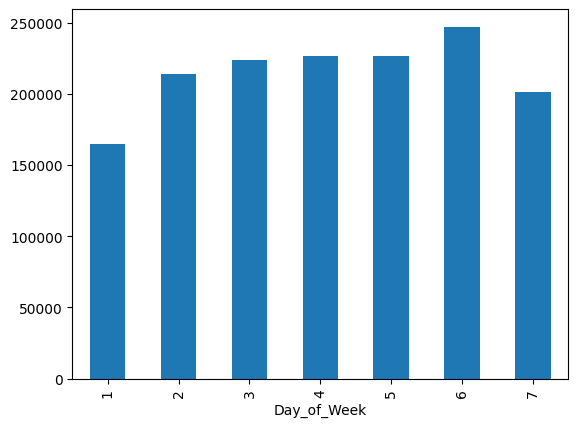

In [ ]:
day_counts = car_acci['Day_of_Week'].value_counts().sort_index()

day_counts.plot(kind='bar')
plt.show()

Saturday is the day of the week with historically the most car accidents

#Exercise 6

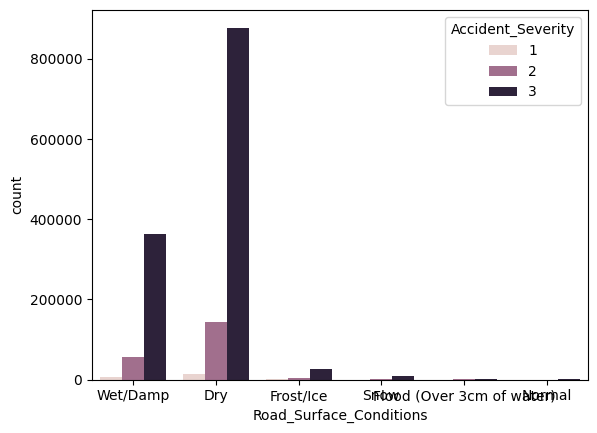

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Road_Surface_Conditions", hue="Accident_Severity", data=car_acci)
plt.show()

The chart above shows that the majority of accidents with the highest severity occur on dry road conditions. The second most common accident serverity occurs on wet/damp road surfaces.

#Exercise 7

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import geopandas as gpd
# This is a super popular library for working with ML and DL algorithms.
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import shapely
import folium
import seaborn as sns
from lonboard import Map, ScatterplotLayer, viz

In [ ]:
car_acci = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/UK_Accident.csv')
small_sample = car_acci[["Accident_Index", "Longitude", "Latitude", "Police_Force", "Accident_Severity", "Number_of_Vehicles", "Number_of_Casualties", "Pedestrian_Crossing-Physical_Facilities", "Light_Conditions", "Weather_Conditions", "Road_Surface_Conditions", "Urban_or_Rural_Area", "Did_Police_Officer_Attend_Scene_of_Accident", "Year"]]

point_gdf = gpd.GeoDataFrame(small_sample)
point_layer = ScatterplotLayer.from_geopandas(
    point_gdf,
    get_fill_color=[255, 0, 0],
)

polygon_gdf = gpd.GeoDataFrame(small_sample)
polygon_layer = SolidPolygonLayer.from_geopandas(
    gdf,
    get_fill_color=[255, 0, 0],
)

m = Map([point_layer, polygon_layer])

KeyError: '[None] not found in axis'

#Exercise 8

In [14]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from lonboard import Map, ScatterplotLayer

car_acci = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/UK_Accident.csv')

small_sample = car_acci[[
    "Accident_Index", "Longitude", "Latitude", "Police_Force", "Accident_Severity",
    "Number_of_Vehicles", "Number_of_Casualties", "Pedestrian_Crossing-Physical_Facilities",
    "Light_Conditions", "Weather_Conditions", "Road_Surface_Conditions",
    "Urban_or_Rural_Area", "Did_Police_Officer_Attend_Scene_of_Accident", "Year"
]].dropna(subset=["Longitude", "Latitude"])


small_sample["geometry"] = [
    Point(xy) for xy in zip(small_sample["Longitude"], small_sample["Latitude"])
]

point_gdf = gpd.GeoDataFrame(small_sample, geometry="geometry", crs="EPSG:4326")

min_lon, max_lon = -4.6, -2.9
min_lat, max_lat = 55.7, 56.1

glasgow_edinburgh_df = point_gdf[
    (point_gdf["Longitude"] >= min_lon) &
    (point_gdf["Longitude"] <= max_lon) &
    (point_gdf["Latitude"] >= min_lat) &
    (point_gdf["Latitude"] <= max_lat)
]

print(len(glasgow_edinburgh_df))


52191


In [15]:
from sklearn.cluster import KMeans

# --- Run K-Means with K = 3 ---
k3 = KMeans(n_clusters=3, random_state=42)
glasgow_edinburgh_df["cluster_k3"] = k3.fit_predict(
    glasgow_edinburgh_df[["Longitude", "Latitude"]]
)

# --- Run K-Means with K = 5 ---
k5 = KMeans(n_clusters=5, random_state=42)
glasgow_edinburgh_df["cluster_k5"] = k5.fit_predict(
    glasgow_edinburgh_df[["Longitude", "Latitude"]]
)

/usr/local/lib/python3.12/dist-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.12/dist-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [16]:
Map(
    ScatterplotLayer(
        glasgow_edinburgh_df,
        get_position=["Longitude", "Latitude"],
        get_fill_color="cluster_k3",
        radius_min_pixels=4,
    )
)

ArrowTypeError: ('Did not pass numpy.dtype object', 'Conversion failed for column geometry with type geometry')

#(B)

#Exercise 1 and 2

/usr/local/lib/python3.12/dist-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


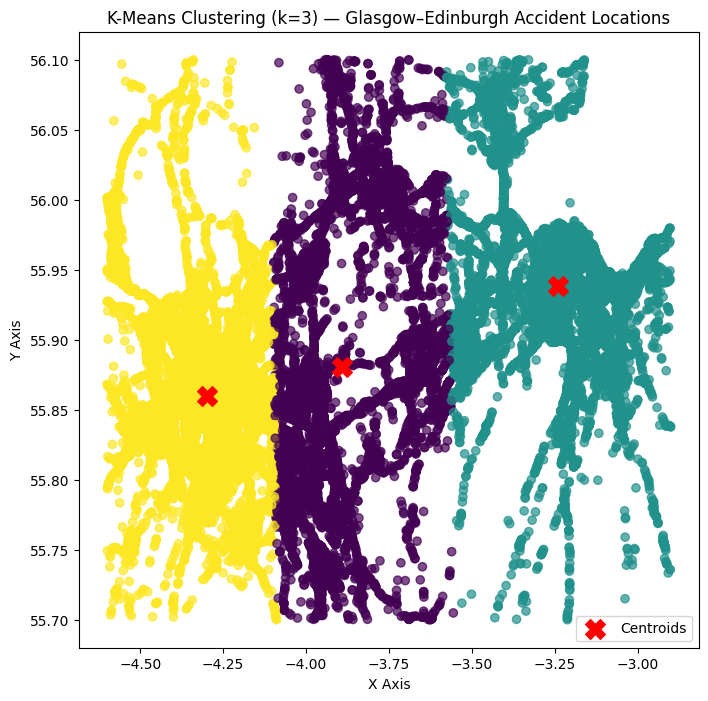

In [18]:
data = glasgow_edinburgh_df[['Longitude', 'Latitude']].values

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(data)
final_centroids = kmeans.cluster_centers_

glasgow_edinburgh_df['cluster_k3'] = clusters

plt.figure(figsize=(8,8))
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1],
            c='red', marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering (k=3) — Glasgow–Edinburgh Accident Locations')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


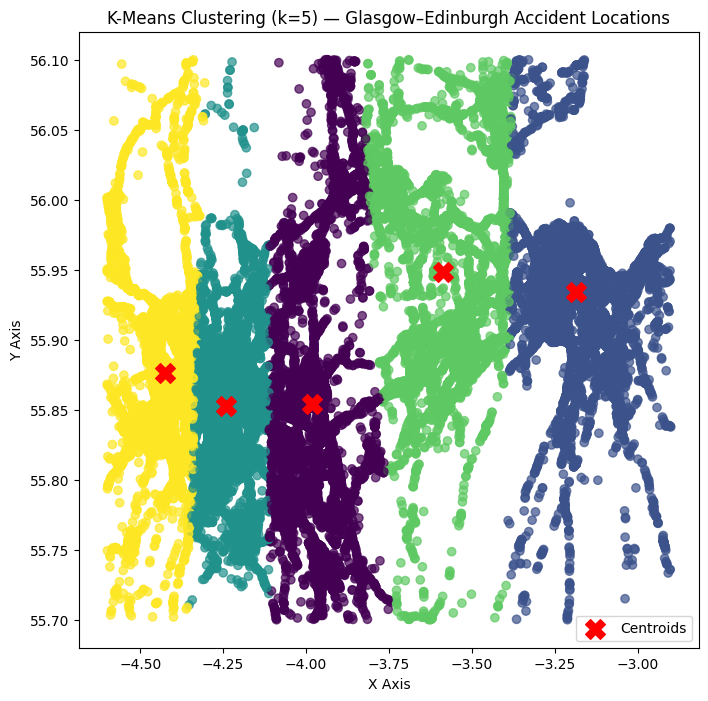

In [19]:
k = 5
kmeans2 = KMeans(n_clusters=k, random_state=42)
clusters2 = kmeans2.fit_predict(data)
final_centroids2 = kmeans2.cluster_centers_

glasgow_edinburgh_df['cluster_k5'] = clusters2

plt.figure(figsize=(8,8))
plt.scatter(data[:, 0], data[:, 1], c=clusters2, cmap='viridis', alpha=0.7)
plt.scatter(final_centroids2[:, 0], final_centroids2[:, 1],
            c='red', marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering (k=5) — Glasgow–Edinburgh Accident Locations')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.show()

From the two The K-Means clustering maps we can observe that the K=3 map shows a broaderd average location of accidents with three centroid clusters whereas the K=5 map shows a more in depth average location of accidents as it has five centroid clusters that span at more sub-region areas. When moving from a k=3 to k=5 map, the clusters change where the new turquoise blue cluster shows a denser hotspot of average location of accidents than perviously and the first three centroids in the k=5 are closer to eachother than on the K=3 map suggesting that there is a high average of location of accidents in Glasgow as a whole compared to Edinburgh.

#Exercise 4

In [23]:
features = glasgow_edinburgh_df[
    ["Longitude", "Latitude", "Accident_Severity", "Number_of_Vehicles", "Number_of_Casualties"]
]

k_attr = KMeans(n_clusters=4, random_state=42)
glasgow_edinburgh_df["cluster_attributes"] = k_attr.fit_predict(features)


/usr/local/lib/python3.12/dist-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


/usr/local/lib/python3.12/dist-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


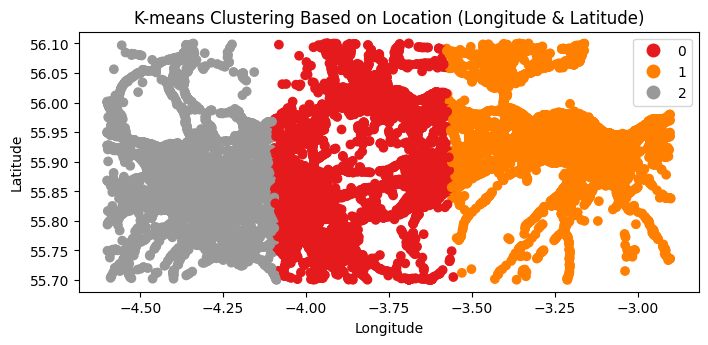

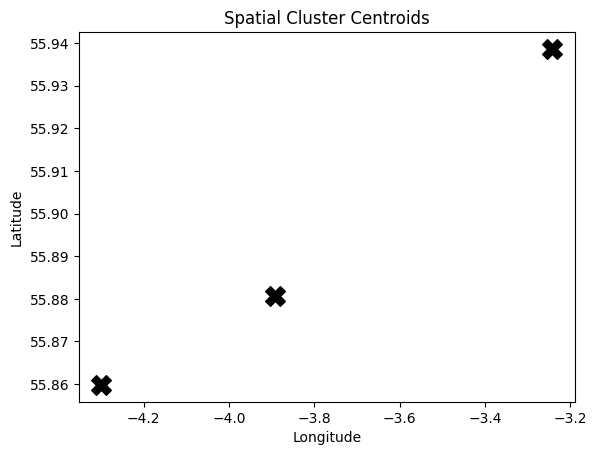

In [38]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


kmeans_spatial = KMeans(n_clusters=3, random_state=42)
glasgow_edinburgh_df["spatial_cluster"] = kmeans_spatial.fit_predict(
    glasgow_edinburgh_df[["Longitude", "Latitude"]]
)

fig, ax = plt.subplots(figsize=(8, 8))
glasgow_edinburgh_df.plot(
    column="spatial_cluster",
    categorical=True,
    legend=True,
    cmap="Set1",
    ax=ax
)
ax.set_title("K-means Clustering Based on Location (Longitude & Latitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

centroids_spatial = kmeans_spatial.cluster_centers_
plt.scatter(
    centroids_spatial[:, 0],
    centroids_spatial[:, 1],
    marker="X",
    s=200,
    color="black"
)
plt.title("Spatial Cluster Centroids")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

#Exercise 5

In [31]:
from lonboard import Map, ScatterplotLayer

Map(
    ScatterplotLayer(
        lonboard_df,
        get_position=["Longitude", "Latitude"],
        get_fill_color="cluster_attributes",
        radius_min_pixels=4,
    )
)

TypeError: 
Unexpected keyword argument: 'get_position'.
Check the spelling of your parameters. If you're trying to use layer properties added by
a layer extension, ensure you've passed the extension object into the `extensions`
parameter of the layer.


# 3. Spatial Analysis and DBSCAN Clustering

## Part A: Spatial Correlation

1. Create another GeoPandas Dataframe by rereading the data to avoid any confusion with the previous geodataframe. This new one is about DBSCAN name it accordingly.

2. Using the [BBox website](https://boundingbox.klokantech.com/), filter the
new geodataframe to contain only the accidents around **Birmingham**.

3. Using the Lonboard library, map the filtered dataset in **Birmingham**.

Before creating any spatial clustering, **it would be beneficial to explore any correlations to identify potential relationships between variables**, such as whether bad weather conditions influence accident severity or whether the number of vehicles involved correlates with the number of casualties.

4. In a code cell, investigate the data type of the attribute list, so you can identify which attributes are numerical and which are categorical. Tip: use `.dtypes`

5. In a code cell. Run the correlation between the numerical attributes by including in your code `corr= your_dataframe.corr()`

**You probably got an error running the previous code.**
**How can you solve this issue?**

Before asking ChatGPT or any GenAI tool, try **Pandas documentation** and see the parameters of the **corr** function, and find which is the parameter you need to only create a correlation matrix only for the numerical attributes. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html


Exercise 1

In [48]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [55]:
import pandas as pd
import geopandas as gpd
import shapely
from shapely.geometry import Point

dbscan_car_acci = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/UK_Accident.csv')
dbscan_car_acci.head()


Unnamed: 0 Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0           0  200501BS00001               525680.0                178240.0   
1           1  200501BS00002               524170.0                181650.0   
2           2  200501BS00003               524520.0                182240.0   
3           3  200501BS00004               526900.0                177530.0   
4           4  200501BS00005               528060.0                179040.0   

   Longitude   Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  -0.191170  51.489096             1                  2                   1   
1  -0.211708  51.520075             1                  3                   1   
2  -0.206458  51.525301             1                  3                   2   
3  -0.173862  51.482442             1                  3                   1   
4  -0.156618  51.495752             1                  3                   1   

   Number_of_Casualties  ...      Pedestrian_Crossing-Physical_Facilities  \
0                     1  ...                               Zebra crossing   
1                     1  ...  Pedestrian phase at traffic signal junction   
2                     1  ...        No physical crossing within 50 meters   
3                     1  ...        No physical crossing within 50 meters   
4                     1  ...        No physical crossing within 50 meters   

                          Light_Conditions          Weather_Conditions  \
0           Daylight: Street light present  Raining without high winds   
1  Darkness: Street lights present and lit     Fine without high winds   
2  Darkness: Street lights present and lit     Fine without high winds   
3           Daylight: Street light present     Fine without high winds   
4        Darkness: Street lighting unknown     Fine without high winds   

   Road_Surface_Conditions Special_Conditions_at_Site  Carriageway_Hazards  \
0                 Wet/Damp                        NaN                  NaN   
1                      Dry                        NaN                  NaN   
2                      Dry                        NaN                  NaN   
3                      Dry                        NaN                  NaN   
4                 Wet/Damp                        NaN                  NaN   

   Urban_or_Rural_Area Did_Police_Officer_Attend_Scene_of_Accident  \
0                    1                                         Yes   
1                    1                                         Yes   
2                    1                                         Yes   
3                    1                                         Yes   
4                    1                                         Yes   

   LSOA_of_Accident_Location  Year  
0                  E01002849  2005  
1                  E01002909  2005  
2                  E01002857  2005  
3                  E01002840  2005  
4                  E01002863  2005  

[5 rows x 33 columns]

In [47]:
dbscan_car_acci.shape

(1504150, 33)

Exercise 2

In [77]:
from shapely.geometry import box

bir_bbox = [-2, 52.40, -1.80, 52.50]

geometry = gpd.points_from_xy(dbscan_car_acci.Longitude, dbscan_car_acci.Latitude)
gdf_dbscan = gpd.GeoDataFrame(dbscan_car_acci, geometry=geometry, crs="EPSG:4326")

birmingham_gdf = gdf_dbscan[gdf_dbscan.geometry.intersects(box(*bir_bbox))]
birmingham_gdf.shape

(20009, 34)

Exercise 3

In [79]:
layer = ScatterplotLayer.from_geopandas(birmingham_gdf)
map = Map(layers=[layer], height=500)
map

Exercise 4

In [80]:
birmingham_gdf.dtypes

Unnamed: 0                                        int64
Accident_Index                                   object
Location_Easting_OSGR                           float64
Location_Northing_OSGR                          float64
Longitude                                       float64
Latitude                                        float64
Police_Force                                      int64
Accident_Severity                                 int64
Number_of_Vehicles                                int64
Number_of_Casualties                              int64
Date                                             object
Day_of_Week                                       int64
Time                                             object
Local_Authority_(District)                        int64
Local_Authority_(Highway)                        object
1st_Road_Class                                    int64
1st_Road_Number                                   int64
Road_Type                                        object
Speed_limit                                       int64
Junction_Control                                 object
2nd_Road_Class                                    int64
2nd_Road_Number                                   int64
Pedestrian_Crossing-Human_Control                object
Pedestrian_Crossing-Physical_Facilities          object
Light_Conditions                                 object
Weather_Conditions                               object
Road_Surface_Conditions                          object
Special_Conditions_at_Site                       object
Carriageway_Hazards                              object
Urban_or_Rural_Area                               int64
Did_Police_Officer_Attend_Scene_of_Accident      object
LSOA_of_Accident_Location                        object
Year                                              int64
geometry                                       geometry
dtype: object

Exercise 5

In [83]:
corr = birmingham_gdf.corr(numeric_only=True)
corr

Unnamed: 0  Location_Easting_OSGR  \
Unnamed: 0                    1.000000              -0.010017   
Location_Easting_OSGR        -0.010017               1.000000   
Location_Northing_OSGR        0.013200               0.046608   
Longitude                    -0.010005               0.999999   
Latitude                      0.013217               0.044952   
Police_Force                 -0.000681               0.001933   
Accident_Severity            -0.003985               0.020727   
Number_of_Vehicles           -0.012956               0.026397   
Number_of_Casualties          0.007193               0.042855   
Day_of_Week                   0.000051              -0.006894   
Local_Authority_(District)    0.010384              -0.119224   
1st_Road_Class               -0.002794               0.054260   
1st_Road_Number               0.001388              -0.022845   
Speed_limit                  -0.003099              -0.072790   
2nd_Road_Class               -0.006449              -0.026296   
2nd_Road_Number               0.003964              -0.041901   
Urban_or_Rural_Area           0.004859              -0.063867   
Year                          0.174338              -0.016377   

                            Location_Northing_OSGR  Longitude  Latitude  \
Unnamed: 0                                0.013200  -0.010005  0.013217   
Location_Easting_OSGR                     0.046608   0.999999  0.044952   
Location_Northing_OSGR                    1.000000   0.047799  0.999999   
Longitude                                 0.047799   1.000000  0.046143   
Latitude                                  0.999999   0.046143  1.000000   
Police_Force                             -0.031039   0.001891 -0.031038   
Accident_Severity                         0.018175   0.020749  0.018142   
Number_of_Vehicles                        0.011081   0.026404  0.011033   
Number_of_Casualties                      0.034769   0.042899  0.034697   
Day_of_Week                              -0.001992  -0.006905 -0.001982   
Local_Authority_(District)               -0.045708  -0.119637 -0.045686   
1st_Road_Class                           -0.085534   0.054212 -0.085670   
1st_Road_Number                           0.213725  -0.022588  0.213782   
Speed_limit                               0.021737  -0.072736  0.021831   
2nd_Road_Class                           -0.036622  -0.026338 -0.036588   
2nd_Road_Number                           0.150437  -0.041733  0.150550   
Urban_or_Rural_Area                      -0.062260  -0.063909 -0.062188   
Year                                     -0.014092  -0.016387 -0.014061   

                            Police_Force  Accident_Severity  \
Unnamed: 0                     -0.000681          -0.003985   
Location_Easting_OSGR           0.001933           0.020727   
Location_Northing_OSGR         -0.031039           0.018175   
Longitude                       0.001891           0.020749   
Latitude                       -0.031038           0.018142   
Police_Force                    1.000000           0.005187   
Accident_Severity               0.005187           1.000000   
Number_of_Vehicles             -0.012417           0.149068   
Number_of_Casualties            0.011166          -0.022936   
Day_of_Week                    -0.004464          -0.002852   
Local_Authority_(District)     -0.258864          -0.006561   
1st_Road_Class                 -0.008231          -0.003277   
1st_Road_Number                -0.007274           0.008802   
Speed_limit                     0.129107          -0.008292   
2nd_Road_Class                  0.004857           0.069412   
2nd_Road_Number                -0.003973           0.038444   
Urban_or_Rural_Area             0.143832           0.000991   
Year                           -0.000312          -0.058456   

                            Number_of_Vehicles  Number_of_Casualties  \
Unnamed: 0                           -0.012956              0.007193   
Location_Easting_OSGR   

6. In a new Code Cell. Adjust the following code to create a heatmap plot of your correlation values.

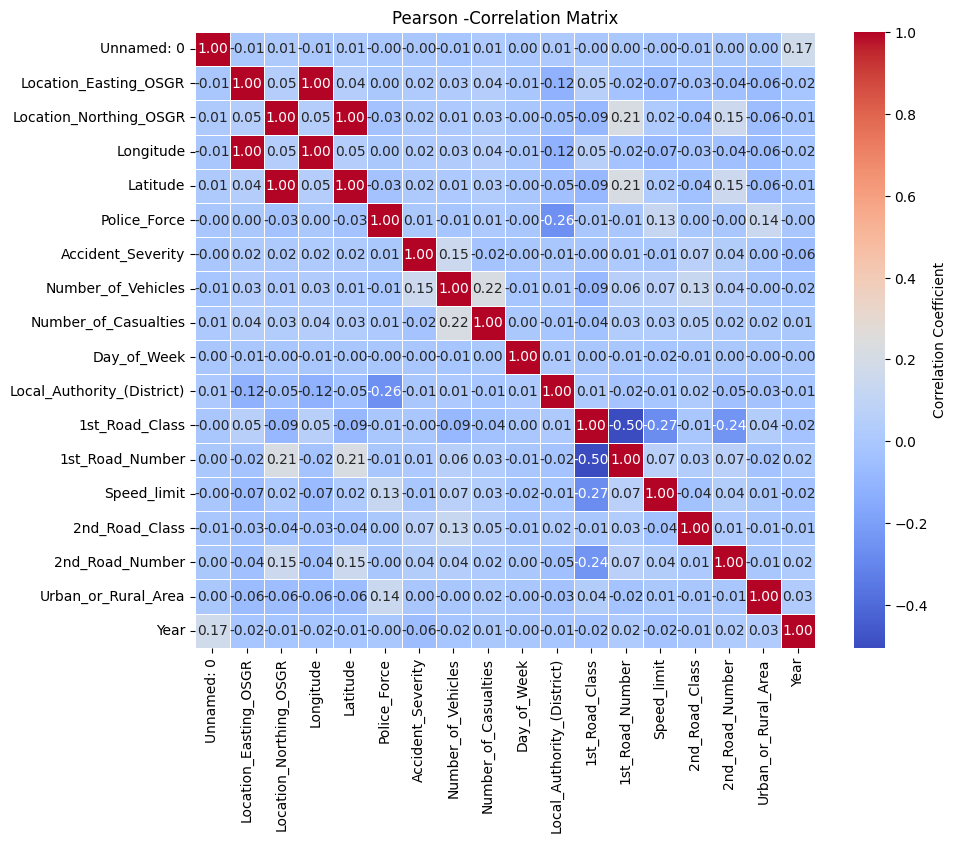

In [84]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title('Pearson -Correlation Matrix')
plt.show()

In terms of predictive modelling, having strong correlations indicate that one variable is an excellent predictor of the other. For example, if `Number_of_Casualties` has a 0.99 correlation (Pearson) with a separate column called `Injured_People_Count`, you know they convey almost identical information.

But **therer are downsides like potential Multicollinearity**, which means, if you are building a predictive model (like linear regression), having two variables that are too highly correlated (often > 0.9) can cause multicollinearity and require you to remove one of them.

Here is where our module associated with **Spatial Data Science** plays an important role. **Spatial statistical models** differ from standard (non-spatial) statistical models because they explicitly account for geographic location and the principle that nearby things are more related than distant things. The first law of geography.

In the same way you have evaluated and learn from the GWR method, in this exercise, we can apply Moran's I.

In this context of our car accident dataset, while a standard stadistic(Pearson) might tell you that severe weather correlates globally with severe accidents, a spatial model could tell us that this relationship only holds true in coastal areas, while in mountain areas, road surface conditions are more important locally.

---

7. Install the library **pysal** by running in a code cell:
`pip install pysal `

8. Now import the new and requieres libraries.

```
import libpysal.weights as weights
from esda.moran import Moran
```
9. You must reproject your dataset (recall the EPSG code you used in the guideline notebook to study spatial data in the UK)



Exercise 7

In [85]:
!pip install pysal

Exercise 8

In [86]:
import libpysal.weights as weights
from esda.moran import Moran

Exercise 9

In [87]:
print(birmingham_gdf.crs)

EPSG:4326


In [92]:
birmingham_gdf_projected = birmingham_gdf.to_crs(epsg=27700)
birmingham_gdf_projected.head()

Unnamed: 0 Accident_Index  Location_Easting_OSGR  \
77221       77221  200520D002703               410540.0   
77223       77223  200520D004603               408930.0   
77224       77224  200520D006503               409780.0   
77227       77227  200520D008403               410090.0   
77230       77230  200520D010403               413000.0   

       Location_Northing_OSGR  Longitude   Latitude  Police_Force  \
77221                285350.0  -1.846293  52.465961            20   
77223                286770.0  -1.869954  52.478755            20   
77224                285710.0  -1.857470  52.469211            20   
77227                286360.0  -1.852887  52.475049            20   
77230                285530.0  -1.810076  52.467526            20   

       Accident_Severity  Number_of_Vehicles  Number_of_Casualties  ...  \
77221                  3                   2                     2  ...   
77223                  1                   1                     2  ...   
77224                  3                   2                     1  ...   
77227                  3                   1                     1  ...   
77230                  3                   3                     2  ...   

                              Light_Conditions       Weather_Conditions  \
77221           Daylight: Street light present  Fine without high winds   
77223           Daylight: Street light present  Fine without high winds   
77224  Darkness: Street lights present and lit  Fine without high winds   
77227           Daylight: Street light present  Fine without high winds   
77230           Daylight: Street light present  Fine without high winds   

      Road_Surface_Conditions  Special_Conditions_at_Site Carriageway_Hazards  \
77221                     Dry                         NaN                 NaN   
77223                     Dry                         NaN                 NaN   
77224                Wet/Damp                         NaN                 NaN   
77227                     Dry                         NaN                 NaN   
77230                     Dry                         NaN                 NaN   

       Urban_or_Rural_Area  Did_Police_Officer_Attend_Scene_of_Accident  \
77221                    1                                          Yes   
77223                    1                                          Yes   
77224                    1                                          Yes   
77227                    1                                           No   
77230                    1                                          Yes   

      LSOA_of_Accident_Location  Year                       geometry  
77221                 E01009337  2005  POINT (410539.483 285346.639)  
77223                 E01009199  2005  POINT (408929.458 286766.629)  
77224                 E01009380  2005  POINT (409779.434 285706.598)  
77227                 E01009333  2005  POINT (410089.448 286356.611)  
77230                 E01008881  2005  POINT (412999.515 285526.563)  

[5 rows x 34 columns]

After you reproject the dataset, you can now use it to run Local Moran's I and Spatial clustering DBSCAN. **Adjust the following code to match your variable and datasets**

In [96]:
w = weights.DistanceBand.from_dataframe(birmingham_gdf_projected, threshold=500, ids=birmingham_gdf_projected.index) #Adjust this line to match your variables.
w.transform = 'R'
moran = Moran(birmingham_gdf_projected['Accident_Severity'], w) #Adjust this line to match your variables.

print(f"\n--- Moran's I Spatial Autocorrelation Analysis ---")
print(f"Defined {w.n} observations and {w.mean_neighbors:.2f} average neighbors per point.")
print(f"\nMoran's I Statistic (Observed I): {moran.I:.4f}")
print(f"P-value (significance): {moran.p_sim:.4f}")


--- Moran's I Spatial Autocorrelation Analysis ---
Defined 20009 observations and 169.53 average neighbors per point.

Moran's I Statistic (Observed I): 0.0016
P-value (significance): 0.0540


**How to read the results:**

The resulting moran.I value tells you about the spatial pattern defined in the requested dataset.

- **Near +1**: High positive spatial autocorrelation
- **Near -1**: Negative spatial autocorrelation
- **Near 0**: A random spatial pattern

10. In a Text Cell, describe with your own words the results., What insights can you gain from the correlation analysis.

The Moran's I Statistic (Observed I): 0.0016 is near to 0, meaning the result has a random spatial pattern. The P-value (significance): 0.0540 suggests that the result is not statistically significant. Overall, these results suggest that the accident severity in Birmingham does not have a strong cluster and is more random.



## Part B: DBSCAN Clustering Implementation:

1. Implement DBSCAN clustering with different **eps** and **min_samples** to the projected dataset.
2. Map the clusters using the Plotly Library.
3. Describe in a Text Cell the clustering results. **How does the choice of eps and min_samples impact the clusters?**. Describe how the clusters change once you adjust multiple versions of that required parameter.
4. In a Text Cell, briefly reflect on the clusters created using **K-Means** and the ones generated with **DBSCAN**. What insights can you gain from that?, Do you see any limitations?
5. Finally, in a new text cell address the following question: **What do you think are the real-world implications of the identified clusters in the field of urban planning?**

---

If you finished the initial guide and all the challenges included in this notebeook. **Upload the finished version of both notebooks to your GitHub repository** (check how to do it in the workbook lab document included in Moodle), and **Congrats you have finished**

### **Important Note:** Avoid using ChatGPT for your reflective notes. Instead, describe in your own words what you observe from your analysis results. I want to see and read your authentic thoughts and insights based on your understanding, rather than a complicated or overly structured response. Take some time to evaluate the results you have obtained and make an effort to briefly describe what you have found.


exercise 1

In [98]:
birmingham_gdf_projected['geometry_x'] = birmingham_gdf_projected.geometry.x
birmingham_gdf_projected['geometry_y'] = birmingham_gdf_projected.geometry.y
birmingham_gdf_projected.head()

meters_eps = 200
min_samples_val = 40

dbscan = DBSCAN(eps=meters_eps, min_samples=min_samples_val)

birmingham_gdf_projected['dbscan_cluster'] = dbscan.fit_predict(
    birmingham_gdf_projected[['geometry_x', 'geometry_y']])

birmingham_gdf_projected.head()

Unnamed: 0 Accident_Index  Location_Easting_OSGR  \
77221       77221  200520D002703               410540.0   
77223       77223  200520D004603               408930.0   
77224       77224  200520D006503               409780.0   
77227       77227  200520D008403               410090.0   
77230       77230  200520D010403               413000.0   

       Location_Northing_OSGR  Longitude   Latitude  Police_Force  \
77221                285350.0  -1.846293  52.465961            20   
77223                286770.0  -1.869954  52.478755            20   
77224                285710.0  -1.857470  52.469211            20   
77227                286360.0  -1.852887  52.475049            20   
77230                285530.0  -1.810076  52.467526            20   

       Accident_Severity  Number_of_Vehicles  Number_of_Casualties  ...  \
77221                  3                   2                     2  ...   
77223                  1                   1                     2  ...   
77224                  3                   2                     1  ...   
77227                  3                   1                     1  ...   
77230                  3                   3                     2  ...   

      Special_Conditions_at_Site  Carriageway_Hazards Urban_or_Rural_Area  \
77221                        NaN                  NaN                   1   
77223                        NaN                  NaN                   1   
77224                        NaN                  NaN                   1   
77227                        NaN                  NaN                   1   
77230                        NaN                  NaN                   1   

       Did_Police_Officer_Attend_Scene_of_Accident LSOA_of_Accident_Location  \
77221                                          Yes                 E01009337   
77223                                          Yes                 E01009199   
77224                                          Yes                 E01009380   
77227                                           No                 E01009333   
77230                                          Yes                 E01008881   

       Year                       geometry     geometry_x     geometry_y  \
77221  2005  POINT (410539.483 285346.639)  410539.482560  285346.638896   
77223  2005  POINT (408929.458 286766.629)  408929.458440  286766.629044   
77224  2005  POINT (409779.434 285706.598)  409779.434074  285706.598471   
77227  2005  POINT (410089.448 286356.611)  410089.448448  286356.611228   
77230  2005  POINT (412999.515 285526.563)  412999.514749  285526.563376   

      dbscan_cluster  
77221              0  
77223             -1  
77224              1  
77227              1  
77230              2  

[5 rows x 37 columns]

exercise 2

In [100]:
import plotly.express as px

fig_dbscan = px.scatter_mapbox(
    birmingham_gdf_projected,
    lat="Latitude",
    lon="Longitude",
    color="dbscan_cluster",
    mapbox_style="carto-positron",
    zoom=9,  # Adjust zoom level as needed
    title="DBSCAN Clustering",
    height=700,    # Set initial height in pixels (width is responsive)
    opacity=0.5,

)
fig_dbscan.show()

excerise 3

The choice of eps and min_samples define the most relevant parameters and impact the clusters in different ways. Eps (200 meters) defines the radius of the Birmingham area and min_samples 40 (Min of 40 points) defines the number of points requires for a dense area.

exercise 4

The K-means and DBSCAN clusters are different in the results of accident severity across Edinburgh/Glasgow and Birmingham. The K=means clusters show more of a overview of all accident severity for Edinburgh/Glasgow with some more dense areas and sparse areas. The DBSCAN clusters for Birmingham goes into more detail with the severity of accidents, using colour to indicate the hotspots of accidents. Overall, although K-means created boundaries and clusers showing regional differences/density, DBSCAN clusters is potentially more useful in real-world scenarios as it shows a more clear indication of high accident areas as well as an overview for the whole city.

exercise 5

The DBSCAN clustering results could be important in real-world ubran planning for Birmingham as it allows planners to determine where more safety improvemts such as more streetlights, traffic sign warnings etc are more needed allowing for government policy and funds to be mindfully and accurately distrubuted.